<a href="https://colab.research.google.com/github/30225/30225/blob/main/notebooks/assignment_01_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Introduction to projective geometry

Andrés Marrugo, PhD    
Universidad Tecnológica de Bolívar    

Adapted from Magnus Oskarsson, Lund University

In this homework we will study the representation of points, lines and planes, and also their transformations under projection.

The exercises are to be solved by "hand" although you may write the answers in markdown/LaTex or include a snapshot of your solution. The computer exercises are to be solved in the corresponding code cell. Enjoy!

## Points in Homogeneous Coordinates

### Exercise 1

 What is the 2D Cartesian coordinates of the points with homogeneous coordinates

\begin{align}
\mathbf{x_1} = \left(
\begin{array}{c}
4\\
-2\\
2\\
\end{array}
\right)
,\enspace
\mathbf{x_2} = \left(
\begin{array}{c}
3\\
-2\\
-1\\
\end{array}
\right)
, \enspace \text{and }
\mathbf{x_3} = \left(
\begin{array}{c}
4\lambda\\
-2\lambda\\
2\lambda\\
\end{array}
\right)
,\enspace
\lambda \neq 0?
\end{align}


What is the interpretation of the point with homogeneous coordinates

\begin{align}
\mathbf{x_4} = \left(
\begin{array}{c}
4\\
-2\\
0\\
\end{array}
\right)
\enspace?
\end{align}

*For the report: Answers are enough.*


### Computer Exercise 1.
Write a Python function `pflat` that divides the homogeneous coordinates with their last entry for points of any dimensionality. (You may assume that none of the points have last homogeneous coordinate zero.) Apply the function to the points in `x2D` and `x3D` in the file `compEx1.npz`, and plot the result.

In [8]:
import numpy as np
import pandas as pd
import urllib.request
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt


In [9]:
DATA_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/compEx1.npz?raw=true'

urllib.request.urlretrieve(DATA_URL, 'compEx1.npz')

data = np.load('compEx1.npz')

x2D = data['x2D']
x3D = data['x3D']

# print(x2D)
# print(x3D)


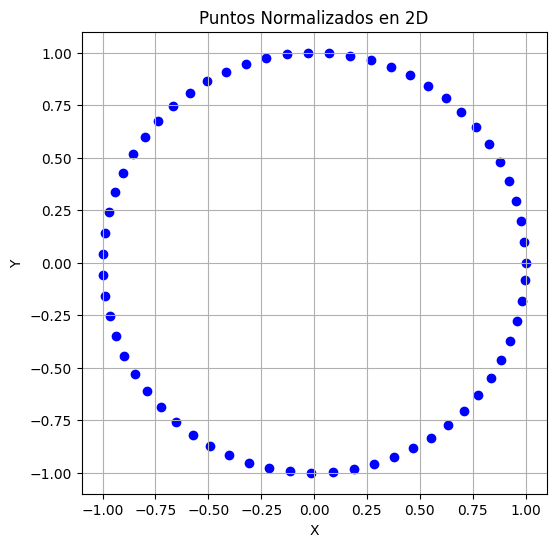

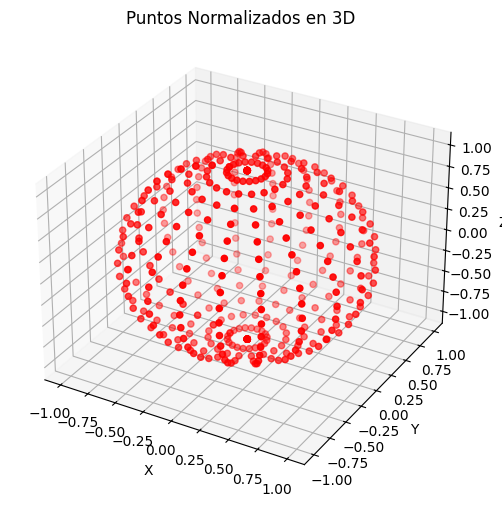

In [10]:
# Computer Exercise 1 - Solution.

def pflat(hx):
  ''' pflat - Normalizes array of homogeneous coordinates (2D or 3D) and converts
      to cartesian (inhomogeneous) coordinates.

      Usage:  x = pflat(hx)
      Argument:
          hx  - an N x npts array of homogeneous coordinates.
      Returns:
          x - an (N-1) x npts array of cartesian (inhomogeneous) coordinates
  '''

  # write your code here.
  return hx[:-1] / hx[-1]  # Divide todas las filas excepto la última por la última fila
  # Useful commands:
  # hx[-1] : indexes the last row of the array
  # x[:-1] : indexes all rows except the last one

# Aplicamos la función pflat a los puntos 2D y 3D
x2D_normalized = pflat(x2D)
x3D_normalized = pflat(x3D)

  # return x

# After defining the pflat function try it on the x2D and x3D points
# x2Dn = pflat(x2D)
# x2Dn.shape # verify shape
# print(x2D) # verify values




# Graficamos los puntos en 2D
plt.figure(figsize=(6, 6))
plt.scatter(x2D_normalized[0, :], x2D_normalized[1, :], marker='o', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Puntos Normalizados en 2D')
plt.grid()
plt.show()

# Use the plt.plot command to plot the points in 2D
# Use the ax.scatter3D command to plot points in 3D



# Graficamos los puntos en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3D_normalized[0, :], x3D_normalized[1, :], x3D_normalized[2, :], marker='o', color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Puntos Normalizados en 3D')
plt.show()


### Exercise 2

Compute the homogeneous coordinates of the intersection (in $\mathbb{P}^2$) of the lines

\begin{align}
l_1 = \left(
\begin{array}{c}
1\\
1\\
1\\
\end{array}
\right)
, \enspace \text{and }
l_2 = \left(
\begin{array}{c}
3\\
2\\
1\\
\end{array}
\right)
.\enspace
\end{align}

What is the corresponding point in $\mathbb{R}^2$?

Compute the intersection (in $\mathbb{P}^2$) of the lines

\begin{align}
l_3 = \left(
\begin{array}{c}
1\\
2\\
3\\
\end{array}
\right)
, \enspace \text{and }
l_4 = \left(
\begin{array}{c}
1\\
2\\
1\\
\end{array}
\right)
.\enspace
\end{align}

what is the geometric interpretation in $\mathbb{R}^2$?

Compute the line that goes through the points with Cartesian coordinates

\begin{align}
x_1 = \left(
\begin{array}{c}
1\\
1\\
\end{array}
\right)
, \enspace \text{and }
x_2 = \left(
\begin{array}{c}
3\\
2\\
\end{array}
\right)
.\enspace
\end{align}

Hint: Re-use the calculations from the line intersections above.

*For the report: Submit a complete solution.*

### Computer exercise 2

Load and plot the image in compEx2.jpg.

In the file `compEx2.npz` there are three pairs of image points. Plot the image points in the same figure as the image.

For each pair of points compute the line going through the points. Use the function `linePoints` to plot the lines in the same image. Do these lines appear to be parallel (in 3D)?

Compute the point of intersection between the second and third line (the lines obtained from the pairs `p2` and `p3`). Plot this point in the same image.

The distance between a 2D-point $x = (x_1, x_2)$ in Cartesian coordinates and a line $l = (a, b, c)$ can be computed using the distance formula

\begin{align}
d = \frac{|ax_1 + bx_2 + c|}{\sqrt{a^2+b^2}}
\end{align}

see your linear algebra book. Compute the distance between the first line and the the intersection point. Is it close to zero? Why/why not?

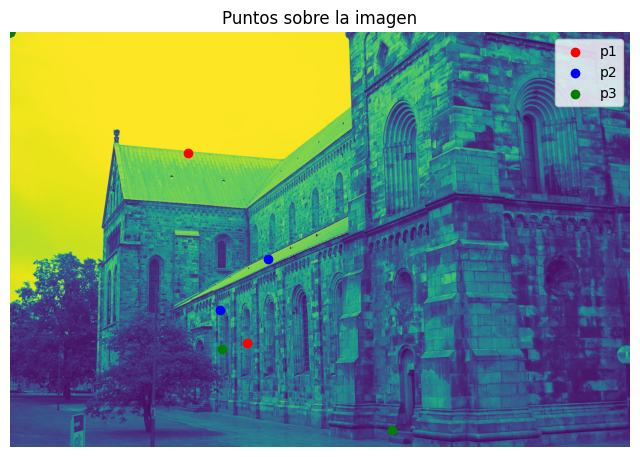

Ecuación de la línea lp1: [ 5.93012743e+02 -1.84848607e+02 -2.59234831e+05]
Ecuación de la línea lp2: [ 1.59930315e+02  1.49001443e+02 -2.34131102e+05]
Ecuación de la línea lp3: [-2.53593388e+02  5.29141374e+02 -3.55821975e+05]


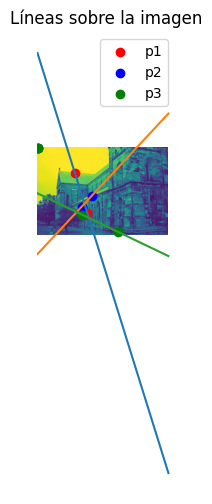

Intersección de lp2 y lp3 en coordenadas homogéneas: [7.08704653e+07 1.16280820e+08 1.22411527e+05]
Intersección de lp2 y lp3 en coordenadas cartesianas: [578.9525464  949.91723738]


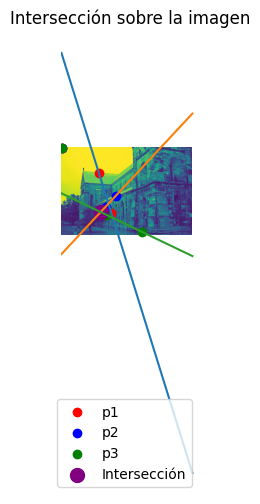

The distance from x23 to lp1 is 147.31


In [12]:
# Computer Exercise 2 - Solution.

# You will use this function for plotting the lines
def linePoints(line = [0, 0, 0], ref = [-1.,1.]):
    """given a,b,c for straight line as ax+by+c=0,
    return and plot a pair of points based on ref values
    e.g linePoints(-1,1,2) == [[-1.0, -3.0], [1.0, -1.0]]
    """
    a = line[0]
    b = line[1]
    c = line[2]
    if (a==0 and b==0):
      raise Exception("linePoints: a and b cannot both be zero")
    else:
      points = np.array([[-c/a,p] if b==0 else [p,(-c-a*p)/b] for p in ref])
      plt.plot(points[:, 0], points[:, 1])
      return points

DATA_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/compEx2.npz?raw=true'
IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/compEx2.JPG?raw=true'

# Descargamos los archivos
urllib.request.urlretrieve(DATA_URL, 'compEx2.npz')
urllib.request.urlretrieve(IMAGE_URL, 'compEx2.JPG')

# Cargamos los puntos desde el archivo .npz
data = np.load('compEx2.npz')

p1 = data['p1']  # Par de puntos 1
p2 = data['p2']  # Par de puntos 2
p3 = data['p3']  # Par de puntos 3

# Cargamos la imagen
image = io.imread('compEx2.JPG')

# ==========================
# 3. Graficamos la imagen y los puntos
# ==========================

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.scatter(p1[:, 0], p1[:, 1], color='red', label='p1')
plt.scatter(p2[:, 0], p2[:, 1], color='blue', label='p2')
plt.scatter(p3[:, 0], p3[:, 1], color='green', label='p3')
plt.legend()
plt.axis('off')
plt.title("Puntos sobre la imagen")
plt.show()


# plt.imshow(image)
# plt.plot(p1[0,:], p1[1,:], 'r*')
# plot remaining points

# plt.show()

# Use np.cross to calculate the lines lp1, lp2, and lp3
# Plot the lines using the function linePoints

# Use np.cross to calculate the intersection x23 of lines lp2 and lp3
# Plot the intersection

# Calculate the distance from the intersection x23 to the line lp1
# Use the above equation

# Print the result
# print('The distance from x23 to lp1 is %2.2f' % d)


# 4. Cálculo de líneas a partir de pares de puntos
# ==========================

def compute_line(p1, p2):
    """
    Calcula la ecuación de la línea que pasa por dos puntos en coordenadas homogéneas.

    Parámetros:
        p1 : ndarray
            Primer punto en coordenadas cartesianas.
        p2 : ndarray
            Segundo punto en coordenadas cartesianas.

    Retorna:
        l : ndarray
            Vector de 3x1 representando la línea en coordenadas homogéneas.
    """
    p1_hom = np.append(p1, 1)  # Convertimos a homogéneas
    p2_hom = np.append(p2, 1)
    return np.cross(p1_hom, p2_hom)

# Calculamos las ecuaciones de las líneas
lp1 = compute_line(p1[0], p1[1])
lp2 = compute_line(p2[0], p2[1])
lp3 = compute_line(p3[0], p3[1])

print("Ecuación de la línea lp1:", lp1)
print("Ecuación de la línea lp2:", lp2)
print("Ecuación de la línea lp3:", lp3)

# ==========================
# 5. Graficamos las líneas en la imagen
# ==========================

plt.figure(figsize=(8, 6))
plt.imshow(image)

linePoints(lp1, ref=[0, image.shape[1]])  # Dibujar línea 1
linePoints(lp2, ref=[0, image.shape[1]])  # Dibujar línea 2
linePoints(lp3, ref=[0, image.shape[1]])  # Dibujar línea 3

plt.scatter(p1[:, 0], p1[:, 1], color='red', label='p1')
plt.scatter(p2[:, 0], p2[:, 1], color='blue', label='p2')
plt.scatter(p3[:, 0], p3[:, 1], color='green', label='p3')

plt.legend()
plt.axis('off')
plt.title("Líneas sobre la imagen")
plt.show()

# ==========================
# 6. Intersección de lp2 y lp3
# ==========================

def intersect_lines(l1, l2):
    """
    Calcula la intersección de dos líneas en coordenadas homogéneas.

    Parámetros:
        l1 : ndarray
            Vector de 3x1 representando la primera línea en P2.
        l2 : ndarray
            Vector de 3x1 representando la segunda línea en P2.

    Retorna:
        x : ndarray
            Punto de intersección en coordenadas homogéneas.
    """
    return np.cross(l1, l2)  # Producto cruzado de los dos vectores

# Calculamos la intersección entre lp2 y lp3
x23_hom = intersect_lines(lp2, lp3)
x23_cartesian = x23_hom[:-1] / x23_hom[-1]  # Convertimos a cartesianas
print("Intersección de lp2 y lp3 en coordenadas homogéneas:", x23_hom)
print("Intersección de lp2 y lp3 en coordenadas cartesianas:", x23_cartesian)

# ==========================
# 7. Graficamos la intersección
# ==========================

plt.figure(figsize=(8, 6))
plt.imshow(image)

linePoints(lp1, ref=[0, image.shape[1]])
linePoints(lp2, ref=[0, image.shape[1]])
linePoints(lp3, ref=[0, image.shape[1]])

plt.scatter(p1[:, 0], p1[:, 1], color='red', label='p1')
plt.scatter(p2[:, 0], p2[:, 1], color='blue', label='p2')
plt.scatter(p3[:, 0], p3[:, 1], color='green', label='p3')
plt.scatter(x23_cartesian[0], x23_cartesian[1], color='purple', s=100, label='Intersección')

plt.legend()
plt.axis('off')
plt.title("Intersección sobre la imagen")
plt.show()

# ==========================
# 8. Cálculo de la distancia entre x23 y lp1
# ==========================

def distance_point_line(x, l):
    """
    Calcula la distancia entre un punto y una línea en R2.

    Parámetros:
        x : ndarray
            Punto en coordenadas cartesianas (x1, x2).
        l : ndarray
            Línea en forma (a, b, c).

    Retorna:
        d : float
            Distancia entre el punto y la línea.
    """
    return np.abs(l[0] * x[0] + l[1] * x[1] + l[2]) / np.sqrt(l[0]**2 + l[1]**2)

# Calculamos la distancia
d = distance_point_line(x23_cartesian, lp1)
print('The distance from x23 to lp1 is %2.2f' % d)

## Projective transformations

### Exercise 3   

Let $H$ be the projective transformation

\begin{align}
H =
\left(
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & 0 \\
-1 & 0 & 1 \\
\end{array}
\right) \enspace.
\end{align}

Compute the transformations $\mathbf{y_1} \sim H\mathbf{x_1}$ and $\mathbf{y_2} \sim H\mathbf{x_2}$ if

\begin{align}
\mathbf{x_1} = \left(
\begin{array}{c}
1\\
0\\
1\\
\end{array}
\right)
, \enspace \text{and }
\mathbf{x_2} = \left(
\begin{array}{c}
0\\
1\\
1\\
\end{array}
\right)
.\enspace
\end{align}

Compute the lines $l_1$, $l_2$ containing $\mathbf{x_1}$, $\mathbf{x_2}$, and $\mathbf{y_1}$, $\mathbf{y_2}$, respectively.

Compute $(H^{-1})^T l_1$ and compare to $l_2$.

*For the report: Submit the answers.*

### Computer Exercise 3

The file `compEx3.npz` contains the start and end points of a set of lines. Plotting the lines gives the grid shown in the figure below.

For each of the projective mappings given by the matrices

\begin{align}
H_1 =
\left(
\begin{array}{ccc}
\sqrt{3} & -1 & 1 \\
1 & \sqrt{3} & 1 \\
0 & 0 & 2 \\
\end{array}
\right), \enspace \text{and }
H_2 =
\left(
\begin{array}{ccc}
1 & -1 & 1 \\
1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right)
\enspace,
\end{align}

\begin{align}
H_3 =
\left(
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 2 & 0 \\
0 & 0 & 1 \\
\end{array}
\right), \enspace \text{and }
H_4 =
\left(
\begin{array}{ccc}
\sqrt{3} & -1 & 1 \\
1 & \sqrt{3} & 1 \\
1/4 & 1/2 & 2 \\
\end{array}
\right)
\enspace,
\end{align}

compute the transformations of the given start and endpoints and plot the lines between them. (Note that you do not need to loop over the points. One matrix multiplication for the start and end points is enough. To compute cartesian coordinates you can use your `pflat` function. Don’t forget to use the `plt.axis('equal')` command, otherwise the figures might look distorted.)

Which of the transformations preserve lengths between points? Which preserve angles between lines? Which maps parallel lines to parallel lines? Classify the transformations into euclidean, similarity, affine and projective transformations.

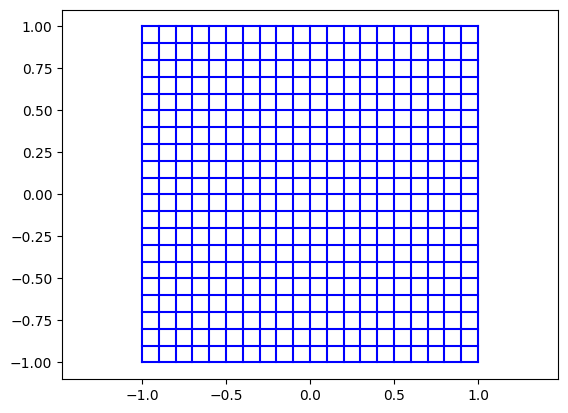

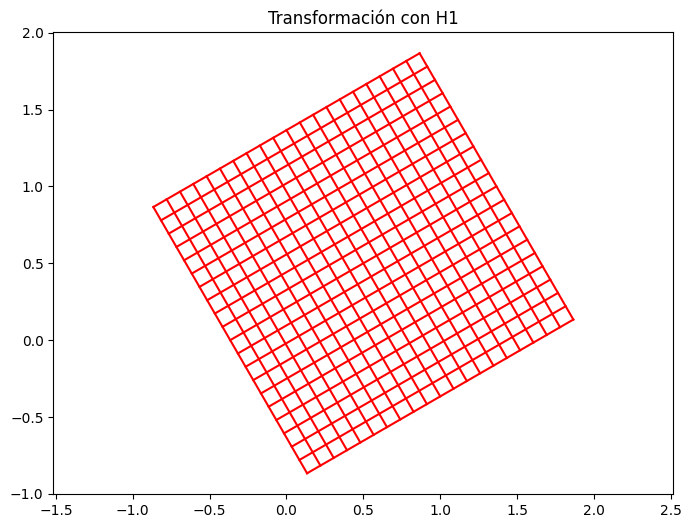

<ipython-input-13-66aaf1dc2a91>:40: RuntimeWarning: divide by zero encountered in divide
  return hx[:-1] / hx[-1]  # Divide todas las filas excepto la última por la última fila
<ipython-input-13-66aaf1dc2a91>:40: RuntimeWarning: invalid value encountered in divide
  return hx[:-1] / hx[-1]  # Divide todas las filas excepto la última por la última fila


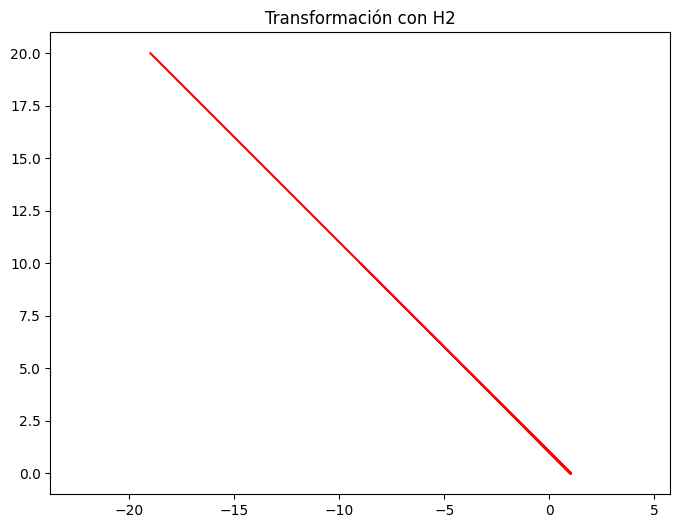

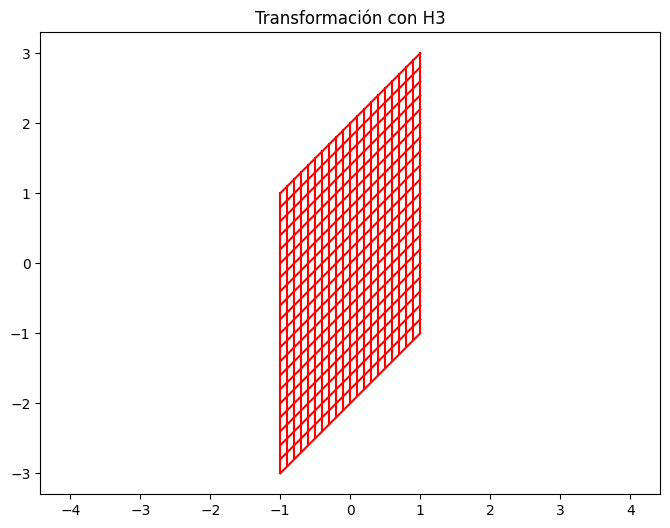

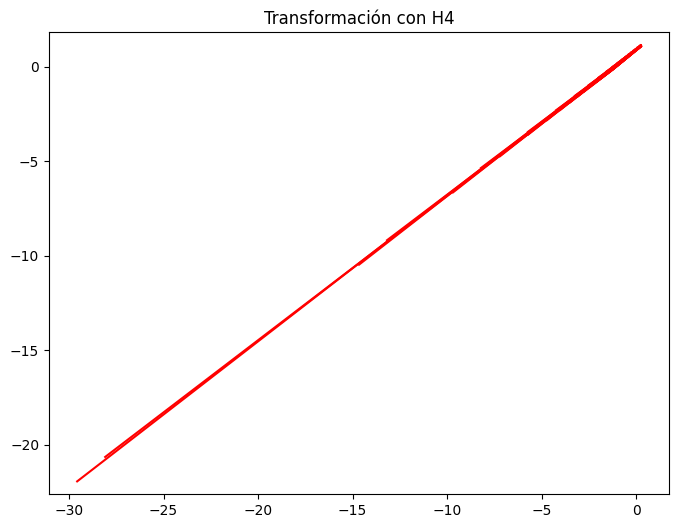

Clasificación de H1: Proyectiva
Clasificación de H2: Proyectiva
Clasificación de H3: Afín
Clasificación de H4: Proyectiva


In [13]:
# Computer Exercise 3 - Solution.

DATA_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/compEx3.npz?raw=true'

import urllib.request
urllib.request.urlretrieve(DATA_URL, 'compEx3.npz')

data = np.load('compEx3.npz')

startpoints = data['startpoints']
endpoints = data['endpoints']

# Plot the grid
plt.plot([startpoints[0, :], endpoints[0, :]], [startpoints[1, :], endpoints[1, :]], 'b-')
plt.axis('equal')
plt.show()

# Build the transformation matrices
H1 = np.array([[np.sqrt(3), -1, 1], [1, np.sqrt(3), 1], [0, 0, 2]])

H2 = np.array([[1, 1, 0], [-1, 0, 1], [0, 1, 1]])
H3 = np.array([[1, 0, 0], [1, 2, 0], [0, 0, 1]])
H4 = np.array([[np.sqrt(3), 1/4, -1], [3 - np.sqrt(1/2), 1, 1], [1, 1, 2]])

# ==========================
# 4. Función para transformar y graficar
# ==========================
def pflat(hx):
    """
    Convierte coordenadas homogéneas en cartesianas dividiendo por la última entrada.

    Parámetros:
        hx : ndarray
            Matriz de coordenadas homogéneas (N x num_puntos).

    Retorna:
        x : ndarray
            Matriz de coordenadas cartesianas (N-1 x num_puntos).
    """
    return hx[:-1] / hx[-1]  # Divide todas las filas excepto la última por la última fila

def transform_and_plot(H, title):
    """
    Aplica una transformación proyectiva a los puntos y los grafica.

    Parámetros:
        H : ndarray
            Matriz de transformación 3x3.
        title : str
            Título del gráfico.
    """
    # Convertimos a coordenadas homogéneas agregando una fila de unos
    start_hom = np.vstack((startpoints, np.ones((1, startpoints.shape[1]))))
    end_hom = np.vstack((endpoints, np.ones((1, endpoints.shape[1]))))

    # Aplicamos la transformación usando multiplicación de matrices
    start_transformed = H @ start_hom
    end_transformed = H @ end_hom

    # Convertimos a coordenadas cartesianas usando pflat
    start_transformed = pflat(start_transformed)
    end_transformed = pflat(end_transformed)

    # Graficamos la transformación
    plt.figure(figsize=(8, 6))
    plt.plot([start_transformed[0, :], end_transformed[0, :]], [start_transformed[1, :], end_transformed[1, :]], 'r-')
    plt.axis('equal')
    plt.title(title)
    plt.show()

# ==========================
# 5. Aplicamos cada transformación y graficamos
# ==========================

transform_and_plot(H1, "Transformación con H1")
transform_and_plot(H2, "Transformación con H2")
transform_and_plot(H3, "Transformación con H3")
transform_and_plot(H4, "Transformación con H4")

# ==========================
# 6. Clasificación de las transformaciones
# ==========================

def classify_transformation(H):
    """
    Clasifica la transformación en euclidiana, similaridad, afín o proyectiva.

    Parámetros:
        H : ndarray
            Matriz de transformación 3x3.

    Retorna:
        str : Tipo de transformación.
    """
    det_H = np.linalg.det(H)
    if np.allclose(H[2], [0, 0, 1]):  # Última fila (0,0,1) -> Transformación afín
        if np.isclose(det_H, 1) and np.allclose(H[:2, :2].T @ H[:2, :2], np.eye(2)):
            return "Euclidiana"  # Mantiene distancias y ángulos
        elif np.isclose(det_H, 1):
            return "Similaridad"  # Mantiene ángulos pero no distancias
        else:
            return "Afín"  # No mantiene distancias ni ángulos, pero mantiene paralelismo
    else:
        return "Proyectiva"  # No mantiene paralelismo

# Imprimimos la clasificación de cada transformación
print("Clasificación de H1:", classify_transformation(H1))
print("Clasificación de H2:", classify_transformation(H2))
print("Clasificación de H3:", classify_transformation(H3))
print("Clasificación de H4:", classify_transformation(H4))

# Make the points homogeneous points (remember to add a row of 1s)

# Transform the points by matrix multiplication (remember to use the @ operator)

# Convert back to cartesian coordinates. You can use your pflat() function

# Include one plot per each transformation matrix


In [ ]:
# Instalar LaTeX (requerido para la conversión a PDF)
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic

from google.colab import files

# Convertir el notebook actual a PDF con código y salidas
!jupyter nbconvert --to pdf "/assignment_01_computer_vision.ipynb"

# Descargar el archivo PDF generado
files.download("/assignment_01_computer_vision.pdf")